<a href="https://colab.research.google.com/github/annaluizacaraciolo/Aprendizagem_de_Maquina/blob/main/Aprendizagem_de_Maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

O dataset sob estudo é o Avila dataset, que foi extraído a partir de 800 imagens tiradas do códice Avila. O dataset possui 10 features e uma coluna de classificação para identificar quem foi o escritor de um determinado trecho. O dataset foi previamente normalizado e as features encontram-se como o tipo númerico. Obtivemos o conjunto de dados já separado em subconjuntos de treino e teste de aproximadamente o mesmo tamanho. Desta forma, podemos importar nossos conjuntos de treino e teste a seguir.

In [ ]:
from google.colab import files
# para o conjunto de treino
files.upload()

In [ ]:
# para o conjunto de teste
files.upload()

In [ ]:
# carregar os .txt de treino e teste como CSV
!pip install pandas --quiet

In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('avila-tr.txt')
df_train.to_csv('avila-tr.csv', index=None, header=None)
df_train.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [ ]:
df_train.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
j    float64
k     object
dtype: object

In [ ]:
df_train.head()

,a,b,c,d,e,f,g,h,i,j,k
0,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
1,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
2,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
3,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
4,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A


In [ ]:
df_test = pd.read_csv('avila-ts.txt')
df_test.to_csv('avila-ts.csv', index=None, header=None)
df_test.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [ ]:
df_test.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
j    float64
k     object
dtype: object

In [ ]:
df_test.head(5)

,a,b,c,d,e,f,g,h,i,j,k
0,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
1,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
2,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
3,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
4,0.068573,-0.181323,-3.210528,-0.294311,-1.168333,0.356414,-0.006326,-0.219550,0.126447,0.448186,F


# Pré-processamento dos dados

In [ ]:
# verificar se é necessário fazer algum tratamento de dados.
# acredito somente que precisaremos tratar a feature de classe para transformá-la em um tipo numérico; no momento, está representada 
# como letras do alfabeto


In [ ]:
y_train = df_train.k
X_train = df_train.drop('k', axis=1)

In [ ]:
y_test = df_test.k
X_test = df_test.drop('k', axis=1)

# Definição e treinamento dos modelos

### Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_1 = tree.DecisionTreeClassifier()
clf_1.fit(X_train,y_train)

DecisionTreeClassifier()

### Naive Bayes

Para realizar o treinamento do classificador naive Bayes, foram escolhidos três modelos: o Gaussiano, multinomial e o de complemento. O naive Bayes Gaussiano assume que a distribuição de classes do conjunto de dados é normal, já o multinomial é apropriado para conjuntos multi-classe e o de complemento é apropriado para conjunto de dados desbalanceados.

In [ ]:
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
clf_2_gaussian = GaussianNB()
clf_2_gaussian.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Acurácia de treino: {}".format(clf_2_gaussian.score(X_train, y_train)))

Acurácia de treino: 0.29619330712436476


In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train_balanced = scaler.fit_transform(X_train)

In [ ]:
clf_2_complement = ComplementNB()
clf_2_complement.fit(X_train_balanced, y_train)

ComplementNB()

In [ ]:
print("Acurácia de treino: {}".format(clf_2_complement.score(X_train_balanced, y_train)))

Acurácia de treino: 0.3314795282385655


In [ ]:
clf_2_multinomial = MultinomialNB()
clf_2_multinomial.fit(X_train_balanced, y_train)

MultinomialNB()

In [ ]:
print("Acurácia de treino: {}".format(clf_2_multinomial.score(X_train_balanced, y_train)))

Acurácia de treino: 0.41087352574551733


### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_3 = LogisticRegression(random_state=0)
clf_3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_4 = KNeighborsClassifier(n_neighbors=3)
clf_4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Teste

### Naive Bayes

Realizamos a predição sob o conjunto de teste para testar cada um dos três modelos, e obtivemos os seguintes resultados de acurácia:

In [ ]:
gaussian_pred = clf_2_gaussian.predict(X_test)
X_test_balanced = scaler.fit_transform(X_test)
multinomial_pred = clf_2_multinomial.predict(X_test_balanced)
complement_pred = clf_2_complement.predict(X_test_balanced)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
gaussian_acc = accuracy_score(y_test, gaussian_pred)
complement_acc = accuracy_score(y_test, complement_pred)
multinomial_acc = accuracy_score(y_test, multinomial_pred)

In [ ]:
print('Acurácias: \nNaive Bayes Gaussiano: {}\nComplement Naive Bayes: {}\nMultinomial Naive Bayes: {}'.format(gaussian_acc, complement_acc, multinomial_acc))

Acurácias: 
Naive Bayes Gaussiano: 0.29331161364507474
Complement Naive Bayes: 0.12773093139133768
Multinomial Naive Bayes: 0.41069375239555383


<AxesSubplot:>

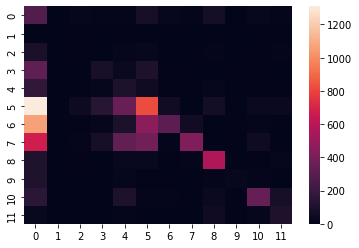

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(gaussian_pred, y_test))

#### Otimização de hiperparâmetros do naive Bayes

Podemos observar que o multinomial teve uma acurácia de teste maior do que a de treino, ultrapassando os resultados de treino do modelo de complemento. Com o modelo que melhor apresentou acurácia de teste, o multinomial, iremos treinar novamente utilizando o método de k-fold para tentar melhorar a acurácia deste modelo ao otimizar alguns hiper-parâmetros:

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False]
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train_balanced,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=5)

In [ ]:
print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))

Best Accuracy Through Grid Search : 0.414


# Métricas
Precision, recall e f1-score

In [ ]:
from sklearn.metrics import classification_report
# o classification report pode ser aplicado em datasets multilabel

In [ ]:
print(classification_report(y_test, gaussian_pred))

              precision    recall  f1-score   support

           A       0.51      0.06      0.11      4286
           B       1.00      1.00      1.00         5
           C       0.05      0.08      0.06       103
           D       0.15      0.24      0.19       353
           E       0.26      0.09      0.13      1095
           F       0.29      0.42      0.34      1962
           G       0.15      0.70      0.25       447
           H       0.22      0.82      0.34       520
           I       0.73      0.68      0.70       832
           W       0.12      0.50      0.19        44
           X       0.46      0.66      0.55       522
           Y       0.46      0.38      0.42       267

    accuracy                           0.29     10436
   macro avg       0.37      0.47      0.36     10436
weighted avg       0.41      0.29      0.25     10436

